Author : Clara Martinez

**Data Analysis : Week2/D-3**

*Daily Challenge : Hands-On Image Transformation and Visualization*

*Installer les bibliothèques nécessaires*

In [52]:
!pip install kaggle
!pip install tensorflow
!pip install matplotlib
!pip install opencv-python
!pip install pillow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


*Installer les bibliothèques nécessaires*

In [53]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import os
from scipy.ndimage import rotate
import cv2
from PIL import ImageEnhance, Image

In [ ]:
#Sur Google Colab
# Configurer Kaggle
# Assurez-vous que le fichier kaggle.json est dans le même répertoire que votre notebook
import shutil
import os

# Créez le répertoire .kaggle s'il n'existe pas
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copiez le fichier kaggle.json dans le répertoire .kaggle
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

# Changez les permissions du fichier kaggle.json
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

# Télécharger et extraire les données
!kaggle datasets download -d olgabelitskaya/flower-color-images
!unzip flower-color-images.zip

# Définir les fonctions de transformation d'image
def rotate_image_30_degrees(image):
    return rotate(image, 30, reshape=False, mode='nearest')

def vertical_flip(image):
    return rotate(image, 180, reshape=False, mode='nearest')

def flip_image(image, mode='horizontal'):
    if mode == 'horizontal':
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")
    return flipped_image

def adjust_contrast(image):
    pil_img = Image.fromarray((image * 255).astype(np.uint8))
    contrast = ImageEnhance.Contrast(pil_img)
    pil_img_enhanced = contrast.enhance(2.0)
    return np.array(pil_img_enhanced) / 255.0

# Afficher les images originales et transformées
list_img = []
plt.figure(figsize=(20, 20))
for i in range(5):
    file = random.choice(os.listdir('flowers/flowers'))
    image_path = os.path.join('flowers/flowers', file)
    img = mpimg.imread(image_path)
    list_img.append(img)

for i, img in enumerate(list_img):
    ax = plt.subplot(3, 5, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

# Appliquer et afficher les transformations
def display_transformed_images(transformation_func, list_img, title):
    transformed_list = []
    plt.figure(figsize=(20, 20))
    for img in list_img:
        transformed_list.append(transformation_func(img))
    for i, img in enumerate(transformed_list):
        ax = plt.subplot(3, 5, i + 1)
        ax.title.set_text(title)
        plt.imshow(img)

display_transformed_images(lambda img: flip_image(img, mode='horizontal'), list_img, 'Horizontal Flip')
display_transformed_images(rotate_image_30_degrees, list_img, 'Rotated 30 Degrees')
display_transformed_images(vertical_flip, list_img, 'Vertical Flip')
display_transformed_images(adjust_contrast, list_img, 'Adjusted Contrast')


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/39.5 MB 2.6 MB/s eta 0:00:16
    --------------------------------------- 0.6/39.5 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.9/39.5 MB 12.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/39.5 MB 16.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.3/39.5 MB 18.1 MB/s eta 0:00:02
   ----- ---------------------------------- 5.4/39.5 MB 20.3 MB/s eta 0:00:02
   ------- -------------------------------- 7.1/39.5 MB 22.6 MB/s eta 0:00:02
   -------- ------------------------------- 8.5/39.5 MB 23.6 MB/s eta 0:00:02
   ---------- ----------------------------- 10.4/39.5 MB 29.7 MB/s eta 0:00:01
   ------------ --------------------------- 12.3/39.5 MB 34.4 MB/s eta 0:00:01
   -------------- ------------------------- 13.9/39.5 MB 36.4 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\moonb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

*Data Preprocessing*

In [5]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Explore the dataset
titanic_data.head()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Types de données courants dans pandas**

**int64** :
Représente des entiers de 64 bits.
Utilisé pour les colonnes contenant des nombres entiers, comme des identifiants ou des compteurs.

**float** :
Représente des nombres à virgule flottante de 64 bits.
Utilisé pour les colonnes contenant des nombres décimaux, comme des mesures ou des valeurs continues.

**object** :
Type générique utilisé pour les données textuelles ou mixtes.
Souvent utilisé pour les colonnes contenant des chaînes de caractères (textes), mais peut aussi contenir d'autres types de données.

**bool** :
Représente des valeurs booléennes (True ou False).
Utilisé pour les colonnes contenant des indicateurs ou des drapeaux.

**datetime64[ns]** :
Représente des données de date et d'heure avec une précision à la nanoseconde.
Utilisé pour les colonnes contenant des dates ou des horodatages.

**category** :
Représente des données catégorielles, qui peuvent prendre un nombre limité de valeurs distinctes.
Utilisé pour les colonnes contenant des catégories ou des étiquettes, ce qui peut réduire l'utilisation de la mémoire et améliorer les performances.

In the provided code example, what is the common key used to merge the Titanic dataset with the passenger demographics dataset? ‘PassengerId’

What is the purpose of the ‘how’ parameter in the pd.merge() function? To indicate whether to perform a left, right, inner, or outer merge.

*Data Cleaning*

In [8]:
# Remove duplicate rows
titanic_data = titanic_data.drop_duplicates()
titanic_data.duplicated().sum()

0

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
# Remove irrelevant columns (e.g., 'Cabin' and 'Ticket')
titanic_data = titanic_data.drop(['Cabin', 'Ticket'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
df = pd.DataFrame(titanic_data)

In [15]:
# Check for missing values in a DataFrame
missing_data = df.isnull()
missing_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [18]:
# Count missing values in each column
missing_counts = df.isnull().sum()
missing_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [21]:
# Remove rows with missing values
df = df.dropna()

In [22]:
# Remove columns with missing values
df = df.dropna(axis=1)

In [25]:
# Fill missing values with a specific value (e.g., 0)
df = df.fillna(0)

In [27]:
# Fill missing values with the mean of the column
#df = df.fillna(df.mean())

# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Remplir les valeurs manquantes dans les colonnes numériques avec la moyenne de chaque colonne
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=2)
#df_imputed = imputer.fit_transform(df)

In [ ]:
from sklearn.impute import KNNImputer

# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

imputer = KNNImputer(n_neighbors=2)
df_numeric_imputed = imputer.fit_transform(df[numeric_cols])

df_numeric_imputed = pd.DataFrame(df_numeric_imputed, columns=numeric_cols)

# Combiner les colonnes numériques imputées avec les colonnes non numériques
df_imputed = pd.concat([df_numeric_imputed, df[non_numeric_cols]], axis=1)

df_imputed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,S
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,S
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,S


In [30]:
# Identify and handle outliers in 'Fare' column
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_data = titanic_data[(titanic_data['Fare'] >= lower_bound) & (titanic_data['Fare'] <= upper_bound)]

![alt text](image.png)

🚀 Challenge : Identify Outliers

Calculate Q1 and Q3 for the ‘Age’ column:
Q1 = 20.125
Q3 = 38.0

Compute the Interquartile Range (IQR):
IQR = Q3 - Q1 = 38.0 - 20.125 = 17.875

Define the lower bound and upper bound for potential outliers based on the IQR:
Lower Bound = Q1 - 1.5 * IQR = 20.125 - 1.5 * 17.875 = -6.25 (Note: Lower bound cannot be negative, so we use 0 as the lower bound)

Upper Bound = Q3 + 1.5 * IQR = 38.0 + 1.5 * 17.875 = 64.125

Identify and count the number of outliers in the ‘Age’ column:
There are no outliers in the ‘Age’ column based on the defined bounds. All ‘Age’ values fall within the range of [0, 64.125].

This means that there are no outliers in the ‘Age’ column of the Titanic dataset based on the IQR method, as all ages fall within the range of [0, 64.125].

*Importation Pandas et dataset*

In [44]:
import pandas as pd
titanic_data = pd.read_csv('train.csv')

*Calculer Q1 et Q3 pour la colonne 'Age'*

In [45]:
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)

*Calculer l'IQR*

In [46]:
IQR = Q3 - Q1

*Définir les bornes inférieure et supérieure pour les outliers potentiels*

In [47]:
lower_bound = max(0, Q1 - 1.5 * IQR)  
upper_bound = Q3 + 1.5 * IQR

*Identifier et compter le nombre d'outliers dans la colonne 'Age'*

In [48]:
outliers = titanic_data[(titanic_data['Age'] < lower_bound) | (titanic_data['Age'] > upper_bound)]

*Resultats*

In [49]:
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers in 'Age': {outliers.shape[0]}")

Q1: 20.125
Q3: 38.0
IQR: 17.875
Lower Bound: 0
Upper Bound: 64.8125
Number of outliers in 'Age': 11


*Optionnel : Filtrer les outliers de la colonne 'Age'*

In [50]:
titanic_data_filtered = titanic_data[(titanic_data['Age'] >= lower_bound) & (titanic_data['Age'] <= upper_bound)]

*Visualisation*

In [51]:
titanic_data_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Data Transformation*

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
titanic_data['Age_normalized'] = scaler.fit_transform(titanic_data[['Age']])

The purpose of **Min-Max normalization** is to rescale data to have values between 0 and 1. This normalization technique is used to bring data on different scales to a standard scale, making it easier to compare and analyze. It ensures that all data values are proportionally adjusted to fit within the specified range, where the minimum value in the original data is mapped to 0, and the maximum value is mapped to 1. Min-Max normalization does not change the relative relationships between data points but ensures that they fall within a common scale, which is particularly important when dealing with machine learning algorithms that are sensitive to the scale of input features.

In [ ]:
from sklearn.decomposition import PCA

#This line creates an instance of the PCA class with the parameter n_components set to 2. It specifies that we want to reduce the dimensionality of the data to 2 principal components. In other words, the data will be projected into a 2D space.
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(original_data)

In the provided code, what does the ‘reduced_data’ variable represent after applying PCA with two components?

After applying **PCA** with two components, the ‘reduced_data’ variable represents the original data ‘original_data’ transformed into a lower-dimensional space with only two principal components. Each row in ‘reduced_data’ corresponds to a data point in the reduced 2D space, where the original features have been projected and represented in a way that retains the most important information.

🚀 Challenge : Short-term Daily Precipitation Forecasting

*Importation Pandas et dataset*

In [24]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')

*Data Exploration*

In [25]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [26]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


*Data Nomalization*

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Temperature_normalized'] = scaler.fit_transform(df[['Temperature (C)']])

In [29]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature_normalized
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.506975
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.505085
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.505445
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.487805
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.495365


*Data Reduction*

Pourquoi utiliser PCA ?

**Réduction de la dimensionnalité** : PCA est utilisé pour réduire le nombre de variables dans un jeu de données tout en conservant autant que possible la variance des données d'origine. Cela peut simplifier l'analyse et améliorer les performances des modèles d'apprentissage automatique.

**Visualisation** : En réduisant les données à deux dimensions, PCA permet de visualiser des jeux de données complexes dans un espace 2D, ce qui peut aider à identifier des structures ou des motifs.

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[numeric_cols])

reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

reduced_df.head()

,PC1,PC2,PC3
0,-7.572204,-64.164118,3.848594
1,-7.529264,-72.179517,4.079929
2,-11.592634,-17.266136,2.180428
3,-7.632113,-82.201400,5.773253
4,-8.418255,-72.215924,4.607561


C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


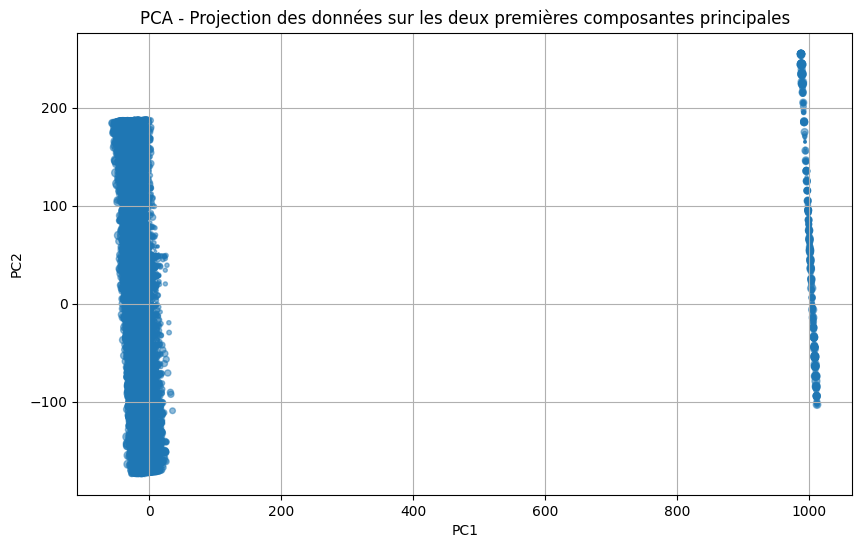

In [ ]:
import matplotlib.pyplot as plt

# Visualiser les résultats avec un graphique de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.title('PCA - Projection des données sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

*Data aggregation*

In [22]:
average_temperature = df.groupby('Humidity')['Temperature (C)'].mean()

average_temperature.head()

Humidity
0.00   -13.560606
0.12    13.888889
0.13    39.905556
0.14    32.637500
0.15    25.514444
Name: Temperature (C), dtype: float64